YOUR NAME
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [7]:
import pandas as pd

mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


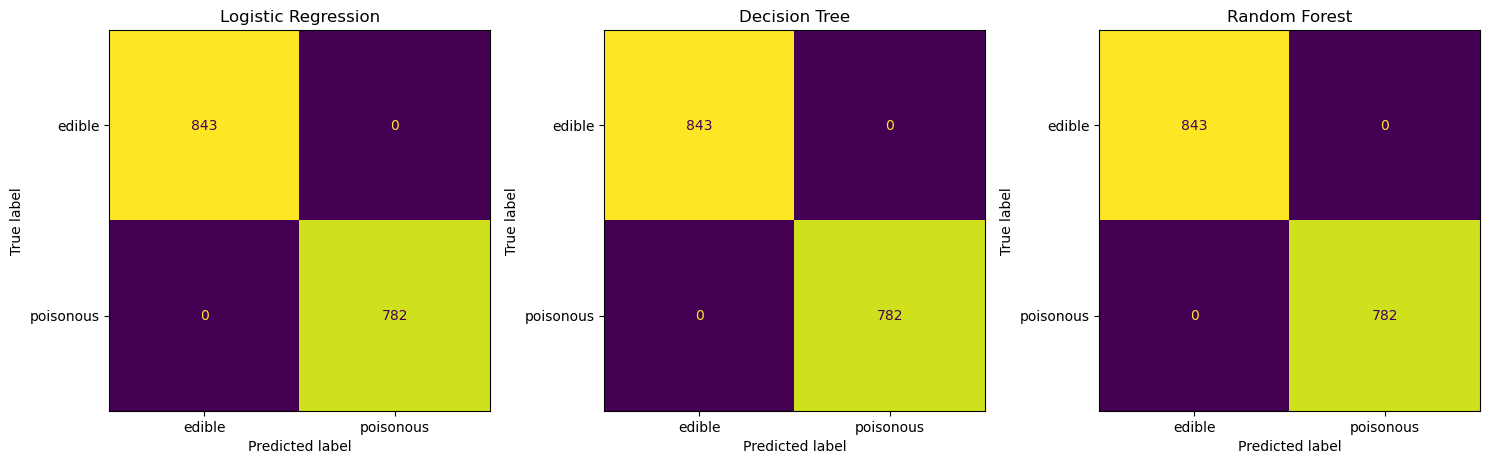

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

X = mushrooms_df.drop(columns=['type'])
y = mushrooms_df['type']

ordinal_features = ['gill_attachment', 'gill_spacing', 'gill_size']
categorical_features = [col for col in X.columns if col not in ordinal_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(cv=5, max_iter=1000))
])
logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])
tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_rf = grid_search.best_estimator_.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, model_name, y_pred in zip(
    axes,
    ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    [y_pred_logistic, y_pred_tree, y_pred_rf]
):
    cm = confusion_matrix(y_test, y_pred, labels=['e', 'p'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['edible', 'poisonous'])
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(model_name)

plt.tight_layout()
plt.show()

### Problem 1 questions

 - Which model was best?
 All of them are equal

 - What were the hyper-parameters of this model.
 The hyper parameters were n_estimator and max_depth

 - What were the accuracy, recall, and precision of the model.
 The accuracy is .97 The recall is .94 and the precision is .98

 - Of accuracy, recall, precision, which did you use to decide the best model.
Recall

#### Your responses here:

- Which model: 
- Hyper-parameters:
- Metrics
    - Accuracy:
    - Recall:
    - Precision:
- How did you decide best? 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [9]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

In [10]:
nfl_draft.head()

,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN


Accuracy: 0.51


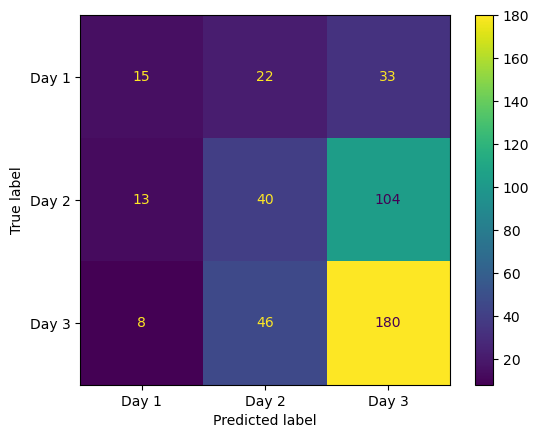

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


def assign_draft_day(round_draft):
    if round_draft == 1:
        return 'Day 1'
    elif round_draft in [2, 3]:
        return 'Day 2'
    else:
        return 'Day 3'

nfl_draft['draft_day'] = nfl_draft['round'].apply(assign_draft_day)

defensive_positions = ['DL', 'LB', 'DB']
defensive_players = nfl_draft[nfl_draft['position'].isin(defensive_positions)]

features = defensive_players.drop(columns=['Unnamed: 0', 'round', 'season', 'name', 'draft_day'])
features = features.fillna(features.median(numeric_only=True))

features = pd.get_dummies(features, columns=['position', 'college_conference'], drop_first=True)

target = defensive_players['draft_day']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred, labels=['Day 1', 'Day 2', 'Day 3'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Day 1', 'Day 2', 'Day 3'])
disp.plot()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
 I used a random forrest classifer becuase of its high accuracy and handling of complex data.
 - What was your accuracy?
 0.51